This is a practice notebook for learning the steps of a machine learning project. We will work on "Titanic - Machine Learning from Disaster" - a comepetition from Kaggle. (Link is given in the next section)
This notebook uses and follows the commands from https://nbviewer.jupyter.org/github/raqueeb/mltraining/blob/master/Python/titanic-project-test.ipynb.

# Introduction to dataset
First explore the kaggle competition: https://www.kaggle.com/c/titanic and study what it's about if did not do that already.

Pandas is a python library which works with data of a dataframe. Pandas is bascially based on Numpy. Pandas has a function 'read_csv' which allows us to read a csv file.

In [1850]:
import pandas as pd

In [1851]:
train = pd.read_csv('https://raw.githubusercontent.com/shegufa/MachineLearning/master/Titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/shegufa/MachineLearning/master/Titanic/test.csv')

Some functions for getting an idea about the dataset.

In [1852]:
train.head(5)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [1853]:
train.shape

(891, 12)

In [1854]:
test.shape

(418, 11)

In [1855]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1856]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see, Age, Cabin, Embarked columns have some missing values in train set and Age, Fare,Cabin columns have missing values in test set.

We can use another function 'isnull()' to know whether a data is null(NaN) or not. So, if we write 'train.isnull().sum()' it sums up number of null data in each column of train.

In [1857]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1858]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data visualization
Data visualization is an important part for getting insights. 
Two important libraries for this job are:
1. matplotlib.pyplot 
2. seaborn 

seaborn is based on matplotlib.

matplotlib inline is used for the plot outputs to be appeared and be stored within the notebook.

To know about Seaborn and Seaborn.set() and more, we can visit:
https://seaborn.pydata.org/generated/seaborn.set.html
https://seaborn.pydata.org/introduction.html




In [1859]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 


We can define functions for our usage. Here, we define a function called 'bar_chart' which takes a feature of the dataset as its parameter. And shows us, how much of survived people belongs to each type of that feature, and how much of dead people belongs to each type of that feature.

For example, the feature 'sex' has two types of data: Male and Female.
So, the desired function will give us an idea about, how many of survived people  were male , how many were female, which was more?
And how many of dead people were male, and how many were female.

In [1860]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

We should try to understand the lines as much as we can by looking at the words. 


Be careful while writing 'DataFrame' in the function, if you write 'dataframe' or 'Dataframe', it will not be recognized.

Okay, let's try out the function with few features.

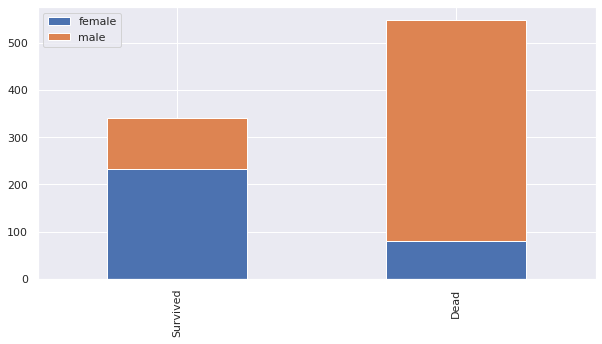

In [1861]:
bar_chart('Sex')

From here, we can see, female passengers survived much more than male passengers.

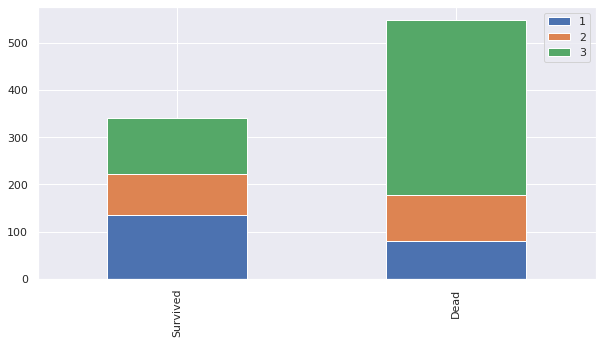

In [1862]:
bar_chart('Pclass')

Passengers of 1st class survived more while passengers of 3rd class died much more than others.

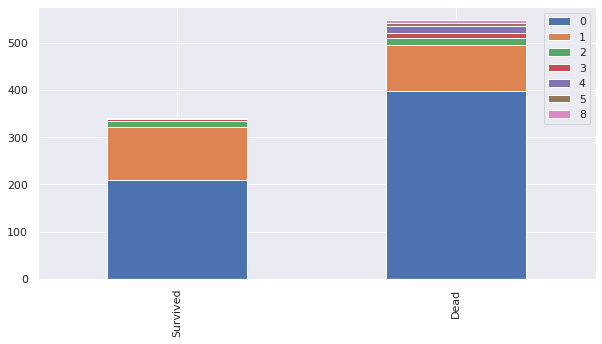

In [1863]:
bar_chart('SibSp')

SibSp column represents number of siblings / spouses aboard the Titanic.

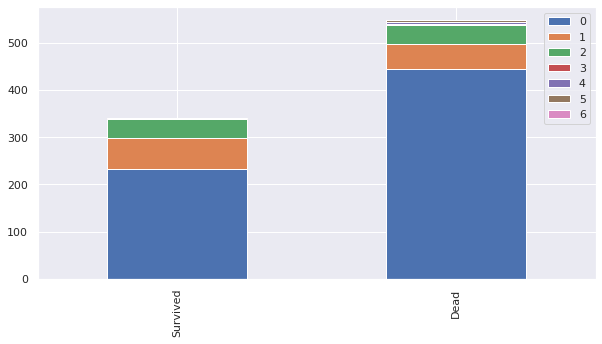

In [1864]:
bar_chart('Parch')

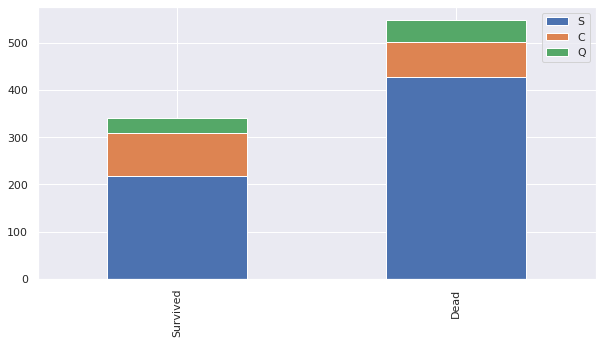

In [1865]:

bar_chart('Embarked')

# Feature Engineering
Processing the features.


When we study the accident of Titanic, we can see that, the Titanic started to sink from the back part of the ship which held most of the passengers of 3rd class. So, PClass is an important classifier. Also, the names of the passengers, actually the titles of their name played a good role. etc.

## Name

Let's first add the test and training datasets and create a feature called 'Title' from 'Name'.

In [1866]:
train_test_data = [train,test]
for dataset in train_test_data:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

"([A-Za-z]+)\." this portion is used as a regular expression for titles. As titles should look like a combination of letters followed by a '.'.
When regular expressions sees a backslash, it knows that it should interpret the next character literally.
For more about regular expression, this might be useful.
https://www.linuxtopia.org/online_books/programming_books/python_programming/python_ch31s02.html


In [1867]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Countess      1
Ms            1
Mme           1
Lady          1
Capt          1
Sir           1
Jonkheer      1
Name: Title, dtype: int64

In [1868]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

We will group the less important titles for this dataset together and also enumerate the titles or map the titles to numbers.

In [1869]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3,"Rev": 3,"Major": 3,"Mlle": 3,"Col": 3,"Mme": 3,"Lady": 3,"Jonkheer": 3,"Don": 3,"Sir": 3,"Capt": 3,"Ms": 3,"Countess": 3,"Dona": 3}
for dataset in train_test_data:
  dataset['Title'] = dataset['Title'].map(title_mapping)

In [1870]:
train.head()

PassengerId  Survived  Pclass  ... Cabin Embarked  Title
0            1         0       3  ...   NaN        S      0
1            2         1       1  ...   C85        C      2
2            3         1       3  ...   NaN        S      1
3            4         1       1  ...  C123        S      2
4            5         0       3  ...   NaN        S      0

[5 rows x 13 columns]

In [1871]:
test.head()

PassengerId  Pclass  ... Embarked Title
0          892       3  ...        Q     0
1          893       3  ...        S     2
2          894       2  ...        Q     0
3          895       3  ...        S     0
4          896       3  ...        S     2

[5 rows x 12 columns]

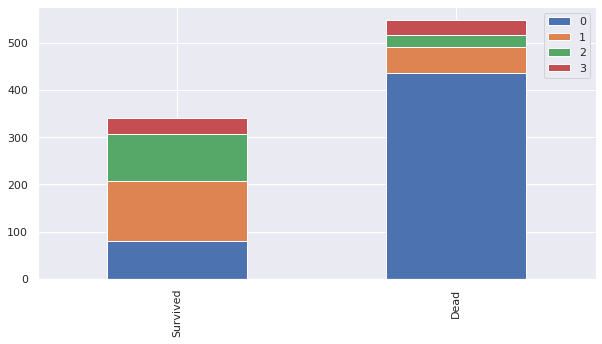

In [1872]:
bar_chart('Title')

Dropping the 'Name' column as it's not necessary anymore.

In [1873]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [1874]:
train.head()

PassengerId  Survived  Pclass     Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    male  ...   7.2500    NaN         S     0
1            2         1       1  female  ...  71.2833    C85         C     2
2            3         1       3  female  ...   7.9250    NaN         S     1
3            4         1       1  female  ...  53.1000   C123         S     2
4            5         0       3    male  ...   8.0500    NaN         S     0

[5 rows x 12 columns]

In [1875]:
test.head()

PassengerId  Pclass     Sex   Age  ...     Fare  Cabin Embarked  Title
0          892       3    male  34.5  ...   7.8292    NaN        Q      0
1          893       3  female  47.0  ...   7.0000    NaN        S      2
2          894       2    male  62.0  ...   9.6875    NaN        Q      0
3          895       3    male  27.0  ...   8.6625    NaN        S      0
4          896       3  female  22.0  ...  12.2875    NaN        S      2

[5 rows x 11 columns]

## Sex

In [1876]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

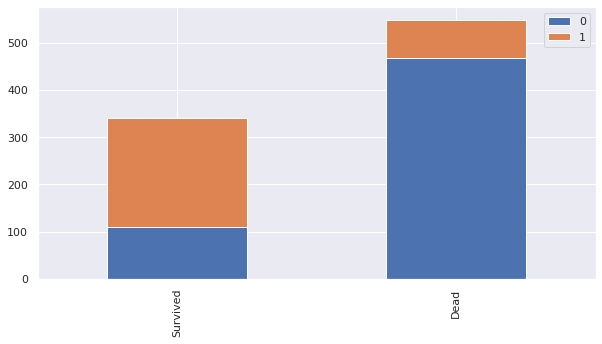

In [1877]:
bar_chart('Sex')

Let's just have a review of what features we have till now.

In [1878]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [1879]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


We have already processed 'Sex' and 'Title' and mapped them to numbers. We have missing values in 'Age' and 'Cabin' in both train set and test set; we have few missing values in 'Embarked' in train set and in 'Fare' in test set. Also , we need to map them to definite numbers. So, let's start again.

## Age

We have missing values. We can fill those up with the mean value. We can use median value too. We will be using median value for now. But think, median value of ages for all passengers would be more meaningful, or if we divide the passengers by a criteria and take median value from each division/group and use them as filling values for that division/group. The second one is obviously more meaningful. 
Here, 'Title' can be a criteria to divide passengers.

In [1880]:
# filling missing age with median age for each title (Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

In [1881]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [1882]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


There is no null value in 'Age' now. We need more processing, specially grouping of data. (It's also called binning)

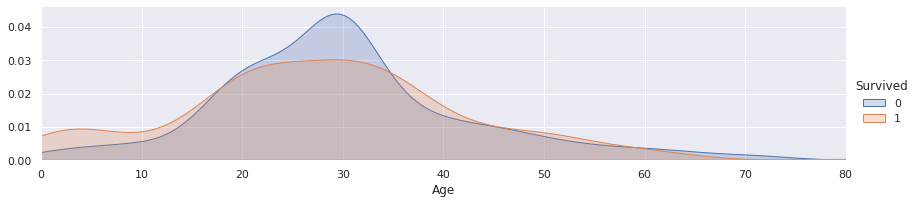

In [1883]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.show()

KDEplot is Plot univariate or bivariate distributions using kernel density estimation. A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions. For more,
https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Try giving more or less values to "aspect" parameter to see what it does.

Try giving "False" value to "shade" parameter to see what it does.

Try without "facet.add_legend()" line to see what it does. 

Let's focus into different groups of age.

(0.0, 20.0)

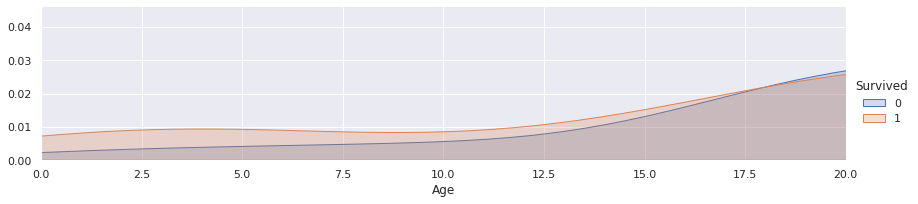

In [1884]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

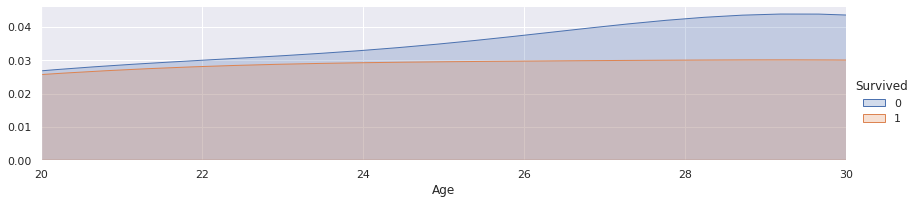

In [1885]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

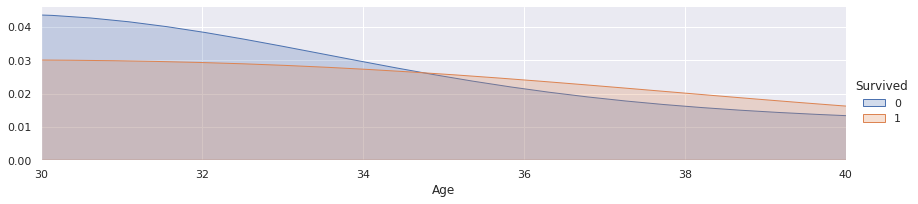

In [1886]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(20.0, 34.0)

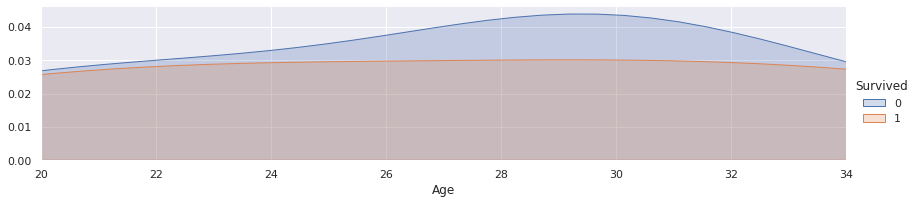

In [1887]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(20, 34)

(40.0, 60.0)

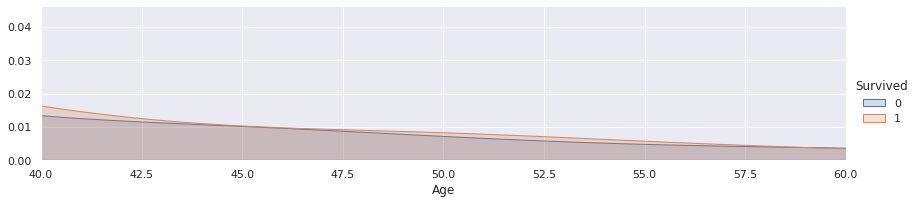

In [1888]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim = (0,train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

We can see passengers aged 20 to 34 has more death rates than other groups.

Okay, now we will divide the 'Age' feature into groups. 
We are trying to change this continuous data feature to some definite discrete groups. 

In [1889]:
for dataset in train_test_data:
  dataset.loc[dataset['Age']<=16,'Age'] = 0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age'] = 1
  dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age'] = 2
  dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age'] = 3
  dataset.loc[dataset['Age']>62 ,'Age'] = 4

In [1890]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    NaN         S     0
1            2         1       1    1  ...  71.2833    C85         C     2
2            3         1       3    1  ...   7.9250    NaN         S     1
3            4         1       1    1  ...  53.1000   C123         S     2
4            5         0       3    0  ...   8.0500    NaN         S     0

[5 rows x 12 columns]

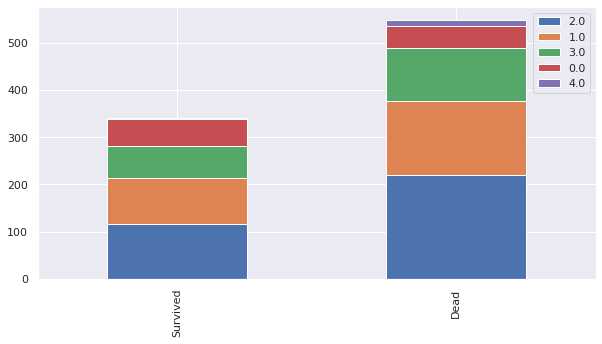

In [1891]:
bar_chart('Age')

The 'Age' feature is processed. 

## Cabin

Cabin has a lot of missing values.

In [1892]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    NaN         S     0
1            2         1       1    1  ...  71.2833    C85         C     2
2            3         1       3    1  ...   7.9250    NaN         S     1
3            4         1       1    1  ...  53.1000   C123         S     2
4            5         0       3    0  ...   8.0500    NaN         S     0

[5 rows x 12 columns]

In [1893]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
E36            1
F38            1
B41            1
D45            1
C32            1
Name: Cabin, Length: 147, dtype: int64

Also, each and every cabin number should not mean anything. Although The first letters can be useful and meaningful. Let's see.

In [1894]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [1895]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    NaN         S     0
1            2         1       1    1  ...  71.2833      C         C     2
2            3         1       3    1  ...   7.9250    NaN         S     1
3            4         1       1    1  ...  53.1000      C         S     2
4            5         0       3    0  ...   8.0500    NaN         S     0

[5 rows x 12 columns]

In [1896]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

Now, it's a bit more organized.
We can just give numeric values to these 8 types. 
Or we can check if there is any relation of cabins with Pclass. There should be, right?

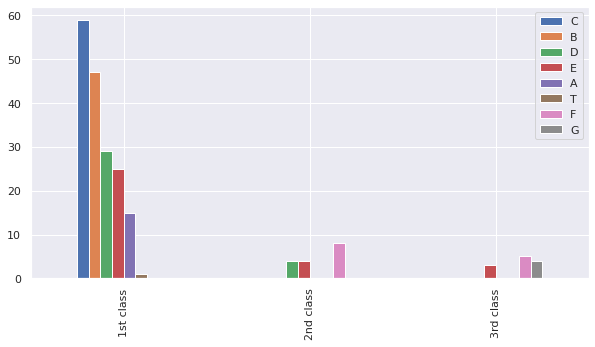

In [1897]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=False, figsize=(10,5))

We can see, "A" is in first class only, so is "B" and "C" and "T", though "T" is not that prominent. First class does not have "F" and "G". etc.

It needs mapping. Mapping can be done in many ways. Also, it needs filling of missing data.

In [1898]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [1899]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [1900]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    2.0         S     0
1            2         1       1    1  ...  71.2833    0.8         C     2
2            3         1       3    1  ...   7.9250    2.0         S     1
3            4         1       1    1  ...  53.1000    0.8         S     2
4            5         0       3    0  ...   8.0500    2.0         S     0

[5 rows x 12 columns]

Also, maybe we can do binning here. But that might create a very similar feature as "Pclass". So, that should not be helpful.

## Embarked


'Embarked' had missing values. We can check the mode value here. We will check for each type of 'Pclass'.

We can see from the data description in Kaggle that, in our dataset,	C = Cherbourg, Q = Queenstown, S = Southampton

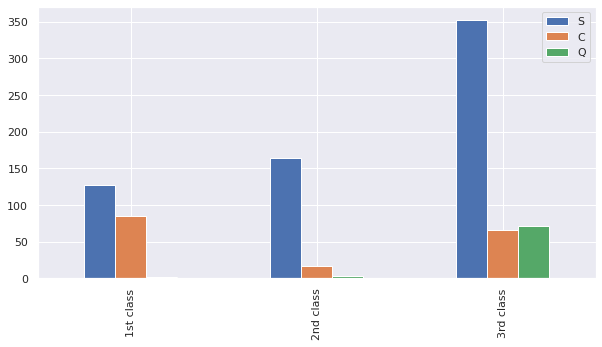

In [1901]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked = False,figsize=(10,5))

We can see, maximum passengers embarked from Southampton, for each type of Pclass. So, we can fill the missing values of this feature with 'S'.

In [1902]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [1903]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 36.0+ KB


In [1904]:
train['Embarked'] = train['Embarked'].fillna('S')

In [1905]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [1906]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    2.0         S     0
1            2         1       1    1  ...  71.2833    0.8         C     2
2            3         1       3    1  ...   7.9250    2.0         S     1
3            4         1       1    1  ...  53.1000    0.8         S     2
4            5         0       3    0  ...   8.0500    2.0         S     0

[5 rows x 12 columns]

We will map the values to numbers now. It's really simple in this case. 

In [1907]:
Embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

In [1908]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    2.0         0     0
1            2         1       1    1  ...  71.2833    0.8         1     2
2            3         1       3    1  ...   7.9250    2.0         0     1
3            4         1       1    1  ...  53.1000    0.8         0     2
4            5         0       3    0  ...   8.0500    2.0         0     0

[5 rows x 12 columns]

The 'Embarked' feature is processed. :)

## Fare

Let's fill the missing values with the median fare of each Pclass. We did not have any missing values for this in train set.

In [1909]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB


In [1910]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("mean"), inplace=True)

In [1911]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    float64
 9   Embarked     418 non-null    int64  
 10  Title        418 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB


In [1912]:
train.head()

PassengerId  Survived  Pclass  Sex  ...     Fare  Cabin  Embarked Title
0            1         0       3    0  ...   7.2500    2.0         0     0
1            2         1       1    1  ...  71.2833    0.8         1     2
2            3         1       3    1  ...   7.9250    2.0         0     1
3            4         1       1    1  ...  53.1000    0.8         0     2
4            5         0       3    0  ...   8.0500    2.0         0     0

[5 rows x 12 columns]

Now, as this is a continous data, let's start binning :D

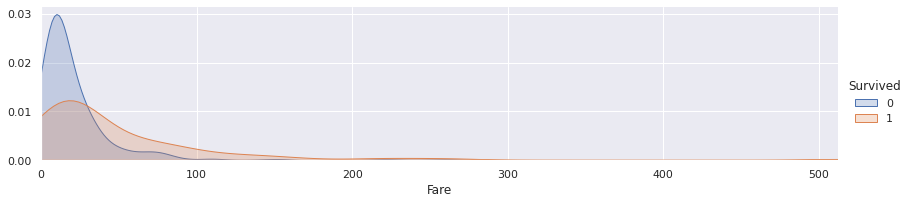

In [1913]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show() 

People who bought tickets for 0 to 100 dollars has a clear difference than other ranges. 

(0.0, 20.0)

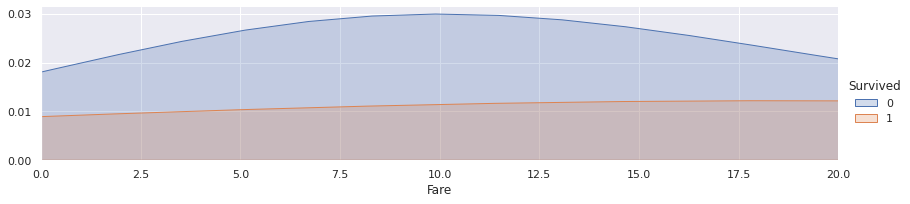

In [1914]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

(0.0, 30.0)

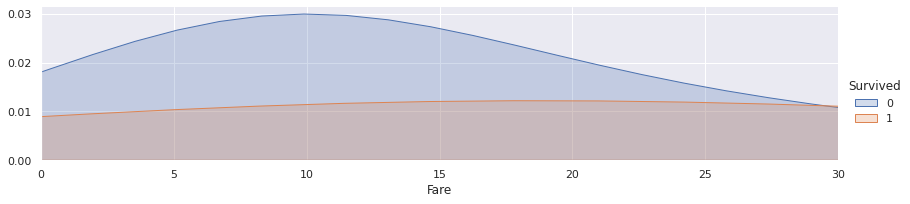

In [1915]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [1916]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30, 100)

(30.0, 100.0)

In [1917]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(100, 500)

(100.0, 500.0)

We can see different types of regions. From 0 to 15-ish, survival rate was much less. Then the difference started to decrease. It makes sense, right? As we saw earlier, passengers of 1st class survived more. So, we can also say people with higher fare survived more.

In [1918]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 16, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 16) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [1919]:
train.head()

PassengerId  Survived  Pclass  Sex  ...  Fare  Cabin  Embarked Title
0            1         0       3    0  ...   0.0    2.0         0     0
1            2         1       1    1  ...   2.0    0.8         1     2
2            3         1       3    1  ...   0.0    2.0         0     1
3            4         1       1    1  ...   2.0    0.8         0     2
4            5         0       3    0  ...   0.0    2.0         0     0

[5 rows x 12 columns]

'Fare' is processed.

We are done processing 'Name', 'Sex', 'Age','Cabin','Embarked','Fare'. We need to go through 'PClass','SibSp','Parch','Ticket'.

## SibSp & Parch

SibSp means number of siblings/spouses aboard  the Titanic. Parch means number of parents / children aboard. So, together this can be represented as number of family members.

In [1920]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
#+1 for the person themselves

In [1921]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 90.6+ KB


In [1922]:
train.head()

PassengerId  Survived  Pclass  Sex  ...  Cabin  Embarked  Title FamilySize
0            1         0       3    0  ...    2.0         0      0          2
1            2         1       1    1  ...    0.8         1      2          2
2            3         1       3    1  ...    2.0         0      1          1
3            4         1       1    1  ...    0.8         0      2          2
4            5         0       3    0  ...    2.0         0      0          1

[5 rows x 13 columns]

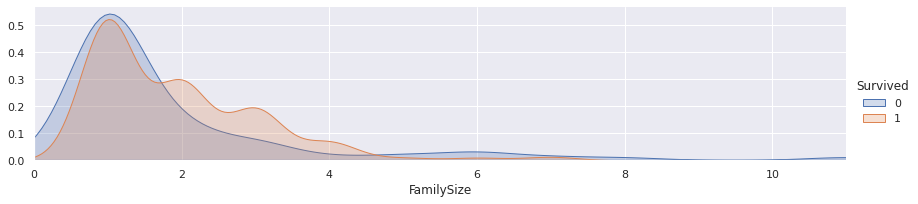

In [1923]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.show()

In [1924]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [1925]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [1926]:
train.head()

PassengerId  Survived  Pclass  Sex  ...  Cabin  Embarked  Title FamilySize
0            1         0       3    0  ...    2.0         0      0        0.4
1            2         1       1    1  ...    0.8         1      2        0.4
2            3         1       3    1  ...    2.0         0      1        0.0
3            4         1       1    1  ...    0.8         0      2        0.4
4            5         0       3    0  ...    2.0         0      0        0.0

[5 rows x 13 columns]

In [1927]:
test.head()

PassengerId  Pclass  Sex  Age  ...  Cabin  Embarked Title  FamilySize
0          892       3    0  2.0  ...    2.0         2     0         0.0
1          893       3    1  3.0  ...    2.0         0     2         0.4
2          894       2    0  3.0  ...    2.0         2     0         0.0
3          895       3    0  2.0  ...    2.0         0     0         0.0
4          896       3    1  1.0  ...    2.0         0     2         0.8

[5 rows x 12 columns]

SibSp, Parch are not needed anymore. Let's drop them.

In [1928]:
features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [1929]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
 10  FamilySize   891 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 76.7+ KB


## Wrapping up the processing


Almost every feature has been processed. We can say, that "Ticket" is not a useful feature at all. Also, "PassengerId" is not really a feature. 

In [1930]:
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)
train = train.drop(['PassengerId'],axis=1)
#did not drop PassengerId from test because we will need it to submit to Kaggle

In [1931]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [1932]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


Now, let's create another dataset from train dataset without the "Survived" column. It will be needed later.

In [1933]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [1934]:
train_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  FamilySize
0       3    0  1.0   0.0    2.0         0      0         0.4
1       1    1  3.0   2.0    0.8         1      2         0.4
2       3    1  1.0   0.0    2.0         0      1         0.0
3       1    1  2.0   2.0    0.8         0      2         0.4
4       3    0  2.0   0.0    2.0         0      0         0.0

# Machine Learning Modeling
Fitting our data into classifiers.

In [1935]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [1936]:
#We will need the cross_val_score from cross-validating our train dataset.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

To learn about cross_val_score 
visit https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [1937]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.7752809  0.7752809  0.88764045 0.7752809
 0.82022472 0.82022472 0.74157303 0.79775281]


In [1938]:
# decision tree Score
round(np.mean(score)*100, 2)

79.91

In [1939]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.84269663 0.82022472 0.78651685 0.86516854 0.79775281
 0.80898876 0.80898876 0.74157303 0.78651685]


In [1940]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.47

In [1941]:
#just wanted to try this.
from sklearn import svm
clf = svm.SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.80898876
 0.84269663 0.85393258 0.84269663 0.86516854]


In [1942]:
# Support Vector Machine
round(np.mean(score)*100, 2)

83.39

So, we are going to select Support Vector Machine classifier.

# Upload to Kaggle

We will have to get output for the test set given and create a csv file to submit to Kaggle.

In [1943]:
clf = clf = svm.SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1)
prediction = clf.predict(test_data)

In [1944]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [1945]:
submission = pd.read_csv('submission.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

Done. Bye.